<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/BoostedTree_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
!unzip  "drive/My Drive/DataDa2/masksfull.zip"

Archive:  drive/My Drive/DataDa2/masksfull.zip
  inflating: MasksFull/mask_009.npy  
  inflating: MasksFull/mask_029.npy  
  inflating: MasksFull/mask_030.npy  
  inflating: MasksFull/mask_010.npy  
  inflating: MasksFull/mask_013.npy  
  inflating: MasksFull/mask_036.npy  
  inflating: MasksFull/mask_008.npy  
  inflating: MasksFull/mask_027.npy  
  inflating: MasksFull/mask_026.npy  
  inflating: MasksFull/mask_012.npy  
  inflating: MasksFull/mask_038.npy  
  inflating: MasksFull/mask_014.npy  
  inflating: MasksFull/mask_021.npy  
  inflating: MasksFull/mask_017.npy  
  inflating: MasksFull/mask_037.npy  
  inflating: MasksFull/mask_019.npy  
  inflating: MasksFull/mask_028.npy  
  inflating: MasksFull/mask_025.npy  
  inflating: MasksFull/mask_018.npy  
  inflating: MasksFull/mask_039.npy  
  inflating: MasksFull/mask_035.npy  
  inflating: MasksFull/mask_011.npy  
  inflating: MasksFull/mask_033.npy  
  inflating: MasksFull/mask_023.npy  
  inflating: MasksFull/mask_022.npy  
  i

In [3]:
!unzip  "drive/My Drive/DataDa2/images_train.zip"
!unzip  "drive/My Drive/DataDa2/images2.zip"

Archive:  drive/My Drive/DataDa2/images_train.zip
  inflating: images/image_000.npy    
  inflating: images/image_001.npy    
  inflating: images/image_002.npy    
  inflating: images/image_003.npy    
  inflating: images/image_004.npy    
  inflating: images/image_005.npy    
  inflating: images/image_006.npy    
  inflating: images/image_007.npy    
  inflating: images/image_008.npy    
  inflating: images/image_009.npy    
  inflating: images/image_010.npy    
  inflating: images/image_011.npy    
  inflating: images/image_012.npy    
  inflating: images/image_013.npy    
  inflating: images/image_014.npy    
  inflating: images/image_015.npy    
  inflating: images/image_016.npy    
  inflating: images/image_017.npy    
  inflating: images/image_018.npy    
  inflating: images/image_019.npy    
Archive:  drive/My Drive/DataDa2/images2.zip
   creating: images 2/
  inflating: images 2/image_020.npy  
  inflating: images 2/image_021.npy  
  inflating: images 2/image_022.npy  
  inflat

In [4]:
from os.path import isfile, join
from os import listdir
import numpy as np
import pandas as pd

In [5]:
def load_images():
  #data = np.empty((0, 10))
  data_list = []

# Process the first range
  for i in range(10):
      X = np.load(f"/content/images/image_00{i}.npy")
      X = X.reshape(10, -1).transpose()
      data_list.append(X)

  # Process the second range
  for i in range(10, 20):
      X = np.load(f"/content/images/image_0{i}.npy")
      X = X.reshape(10, -1).transpose()
      data_list.append(X)

  for i in range(20, 40):
        X = np.load(f"/content/images 2/image_0{i}.npy")
        X = X.reshape(10, -1).transpose()
        data_list.append(X)
  # Concatenate all arrays in the list along the first axis (number of features)
  data = np.concatenate(data_list, axis=0)
  print(data.shape)
  return data

In [6]:
def load_masks():
  #data = np.empty((0, 10))
  mask_list = []

# Process the first range
  for i in range(10):
      temp = np.load(f"/content/MasksFull/mask_00{i}.npy")
      temp = temp.reshape(1, -1).transpose()
      mask_list.append(temp)

  # Process the second range
  for i in range(10, 40):
      temp = np.load(f"/content/MasksFull/mask_0{i}.npy")
      temp = temp.reshape(1, -1).transpose()
      mask_list.append(temp)

  # Concatenate all arrays in the list along the first axis (number of features)
  y = np.concatenate(mask_list, axis=0)

  return y

In [7]:
X = load_images()

(41943040, 10)


In [8]:
y = load_masks()

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
#X_train, y_train, X_test, y_test = train_test_split(X1,y1, test_size=0.2, random_state=1)

# Step 3: Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,   # Labels
    test_size=0.2,          # Adjust the test size as needed
    random_state=11         # Set a random seed for reproducibility
)

print(np.min(y_test), np.max(y_test))
print(np.min(y_train), np.max(y_train))

-5.939021 147.62091
-5.601946 139.2023


In [10]:
import xgboost
from sklearn.model_selection import GridSearchCV

'''
xgb = xgboost.XGBRegressor(random_state=0)
param_grid = {"max_depth": range(1,6)}
# FIXME: MSE is used? check!
grid_model = GridSearchCV(xgb, param_grid, cv=5, refit=True,scoring="neg_mean_squared_error")
grid_model.fit(X_train, y_train)
print("Best hyperparameters::\n{}".format(grid_model.best_params_))
'''

SyntaxError: ignored

In [ ]:
import xgboost
# instantiate the model
model = xgboost.XGBRegressor(objective ='reg:squarederror',
                             colsample_bytree = 0.6,
                             learning_rate = 0.01,
                             max_depth = 5,
                             reg_lambda = 1,
                             n_estimators = 300)

model.fit(X_train, y_train)



In [13]:
preds = model.predict(X_test)

RMSE: 6.870632171630859


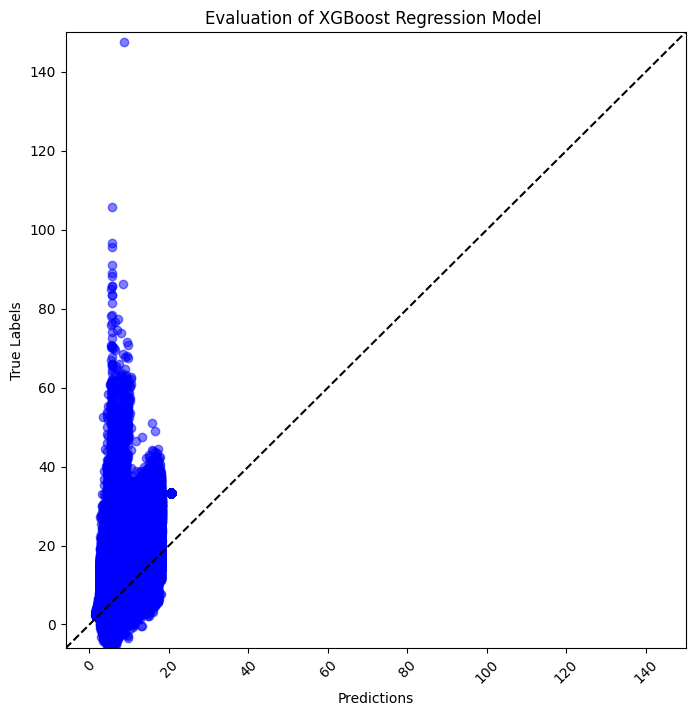

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y_test, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-6, 150], [-6, 150], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-6, 150])
plt.ylim([-6, 150])
plt.title("Evaluation of XGBoost Regression Model ")
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.160675
